In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fuelconsumption/FuelConsumption_file.csv


In [2]:
#Importing required libraries 
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [6]:
data = pd.read_csv("/kaggle/input/fuelconsumption/FuelConsumption_file.csv")
data.head()

,Unnamed: 0,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


**Analyzing the Data**
* descibe function returns the number of samples, avearge, standard deviation, minimum and maximum values for each of the features

In [7]:
data.describe()

,Unnamed: 0,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.000000,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,533.000000,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,308.160672,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,0.000000,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,266.500000,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,533.000000,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,799.500000,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,1066.000000,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [8]:
#Selecting number of cylinders, size of the engine, fuel consumption and co2 emissions

new_data = data[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
new_data.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


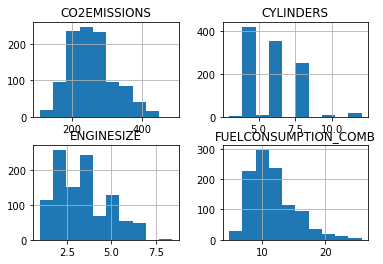

In [9]:
#Plotting each of these features
new_data.hist()
plt.show()

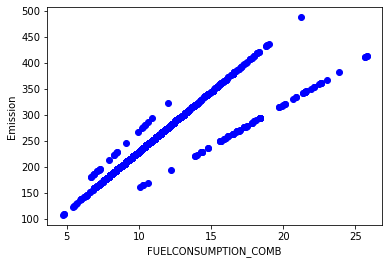

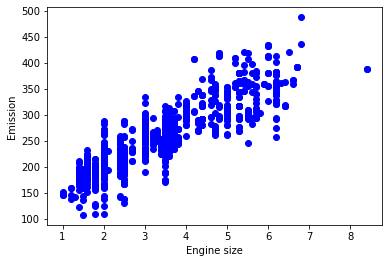

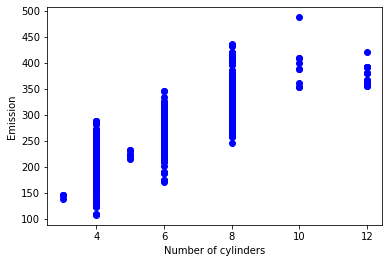

In [10]:
# To observe the linear relationship 
plt.scatter(new_data.FUELCONSUMPTION_COMB, new_data.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

plt.scatter(new_data.ENGINESIZE, new_data.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

plt.scatter(new_data.CYLINDERS, new_data.CO2EMISSIONS,  color='blue')
plt.xlabel("Number of cylinders")
plt.ylabel("Emission")
plt.show()


**Train_test split**

In [13]:
msk = np.random.rand(len(new_data)) < 0.8
train = new_data[msk]
test = new_data[~msk]

**This is a SIMPLE REGRESSION Model**
So we use only one feature for prediction.
We  use Engine Size

In [14]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

In [15]:
model = reg.fit(train_x,train_y)

m: [[38.5979677]]
c: [126.90902082]


Text(0.5, 1.0, 'The best fit line')

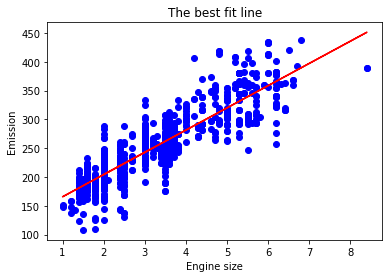

In [17]:
print("m:",model.coef_)
print("c:",model.intercept_)
# The best linear line fitting the data model
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, reg.coef_[0][0]*train_x + reg.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.title("The best fit line")

In [18]:
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
pred_y =model.predict(test_x)

In [19]:
pred_y

array([[262.00190775],
       [354.63703022],
       [242.70292391],
       [242.70292391],
       [204.10495621],
       [242.70292391],
       [289.02048514],
       [289.02048514],
       [242.70292391],
       [281.3008916 ],
       [242.70292391],
       [281.3008916 ],
       [358.49682699],
       [204.10495621],
       [204.10495621],
       [242.70292391],
       [296.74007868],
       [242.70292391],
       [358.49682699],
       [242.70292391],
       [242.70292391],
       [296.74007868],
       [204.10495621],
       [242.70292391],
       [296.74007868],
       [204.10495621],
       [204.10495621],
       [265.86170452],
       [265.86170452],
       [265.86170452],
       [242.70292391],
       [265.86170452],
       [265.86170452],
       [366.21642053],
       [292.88028191],
       [331.47824961],
       [331.47824961],
       [331.47824961],
       [312.17926576],
       [219.54414329],
       [366.21642053],
       [180.94617559],
       [180.94617559],
       [331

In [21]:
from sklearn.metrics import r2_score
#Printing the R2 score
#higher the R_square score more close the data is to the line
print("R2-score: %.2f" % r2_score(pred_y , test_y) )

R2-score: 0.64


In [28]:
print("The mean absolute error:{}".format(np.mean(np.absolute(pred_y-test_y))))

The mean absolute error:24.286782832956916


In [30]:
print("The mean square error:{}".format(np.mean((pred_y-test_y)**2)))

The mean square error:1046.4792905949516


In [39]:
x = np.asarray([10])
print(model.predict(x.reshape(1,1)))

[[512.88869777]]


In [ ]:
plt.scatter(test_x, test_y,  color='blue')
plt.scatter(test_x, pred_y,  color='red')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()